#### Type II ANOVA

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

In [2]:
%precision 3

'%.3f'

In [3]:
sales = pd.read_csv('C:/Users/KIHyuk/Desktop/파이썬으로 배우는 통계학 교과서 예제소스/5-3-1-lm-model.csv')

In [7]:
sales.head(10)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy
5,27.2,290,174.4,20.8,rainy
6,29.3,290,238.6,23.7,rainy
7,26.4,290,190.8,15.2,rainy
8,27.9,290,211.2,18.7,rainy
9,38.0,290,204.5,20.2,rainy


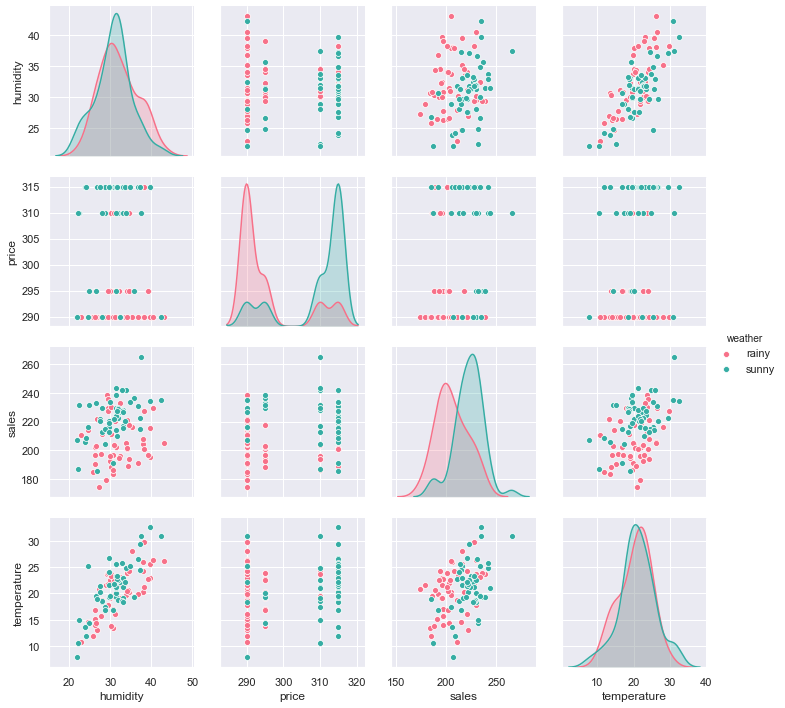

In [6]:
# 시각화
sns.pairplot(data=sales, hue='weather', palette='husl')

#### 독립변수 간의 관계 조사

In [10]:
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


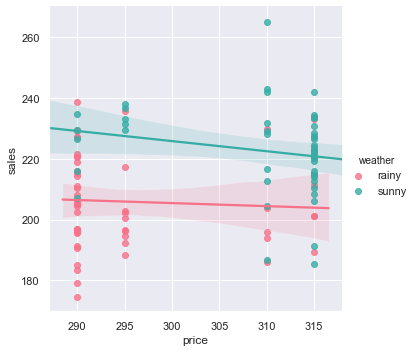

In [13]:
# 날씨가 같았을 때 상품 가격이 매상에 미치는 영향
sns.lmplot(x='price', y='sales', data=sales, hue='weather', palette='husl')

#### 복수의 독립변수를 가지는 모델

In [14]:
# 복수의 독립변수를 가진 모델을 추정
lm_sales = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    data=sales
).fit()

lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

#### Type II ANOVA와 수정제곱합

In [16]:
mod_full = smf.ols(
    "sales ~ weather + humidity + temperature + price", data=sales
).fit()

# typ2 , 수정제곱합 확인
sm.stats.anova_lm(mod_full,typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN
